In [2]:
import pandas as pd

# # Install scikit-learn
# %pip install scikit-learn


from sklearn.linear_model import (
    LinearRegression,
)  # used to create a linear regression model.
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)  # evaluate the performance of machine learning models
import numpy as np
import matplotlib.pyplot as plt

# %pip install statsmodels
import statsmodels.api as sm


In [3]:
# Load dataset
df = pd.read_excel('Platinum_data_filtered.xlsx')

In [4]:
# Display the first few rows
print(df.head())

# Check for any missing values
print(df.isnull().sum())

        date        open        high         low       close  volume
0 2019-03-01  861.599976  861.599976  861.599976  861.599976       0
1 2019-03-04  836.799988  836.799988  836.799988  836.799988       0
2 2019-03-05  840.200012  840.200012  835.900024  835.900024       2
3 2019-03-06  828.299988  828.400024  826.200012  826.200012       2
4 2019-03-07  825.000000  825.000000  815.299988  815.299988       4
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [5]:
# Check the data types of all columns in the DataFrame
print(df.dtypes)


date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object



SPLITING DATA 7-2-1


In [6]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [7]:
# Part of preparing data for training model
x_train = np.array(train_data.index).reshape(-1, 1) #reshapes the array into a 2D array
y_train = np.array(train_data['close']) #converts the "close" column of the train_data DataFrame into a 1D NumPy array

In [8]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [9]:
# The trained model uses the x_test data to make predictions, and the predicted values are stored in y_pred.
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data["close"])
y_pred = model.predict(x_test)

# Validation process
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data["close"])
y_pred_val = model.predict(x_val)

In [10]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1094.41917194 1094.58335077 1094.7475296  1094.91170843 1095.07588726
 1095.24006609 1095.40424491 1095.56842374 1095.73260257 1095.8967814
 1096.06096023 1096.22513906 1096.38931789 1096.55349672 1096.71767555
 1096.88185437 1097.0460332  1097.21021203 1097.37439086 1097.53856969
 1097.70274852 1097.86692735 1098.03110618 1098.19528501 1098.35946384
 1098.52364266 1098.68782149 1098.85200032 1099.01617915 1099.18035798]


In [11]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  107.91501626842015
Testing MAE:  89.36602678754747
Testing MAPE:  9.609297359475036
Validation RMSE:  145.1869319753815
Validation MAE:  137.53038748466008
Validation MAPE:  14.827019171861425


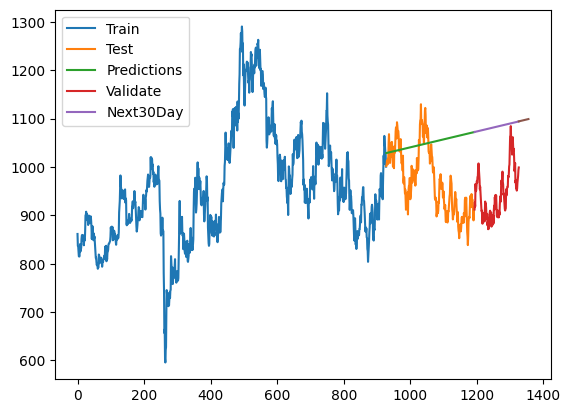

In [12]:
# Plot



plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [13]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     69.61
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.79e-16
Time:                        09:38:42   Log-Likelihood:                -8007.9
No. Observations:                1327   AIC:                         1.602e+04
Df Residuals:                    1325   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.0017      5.549    165.075      0.0

I. Analyze Residuals (7:2:1)

1. Residual Plot

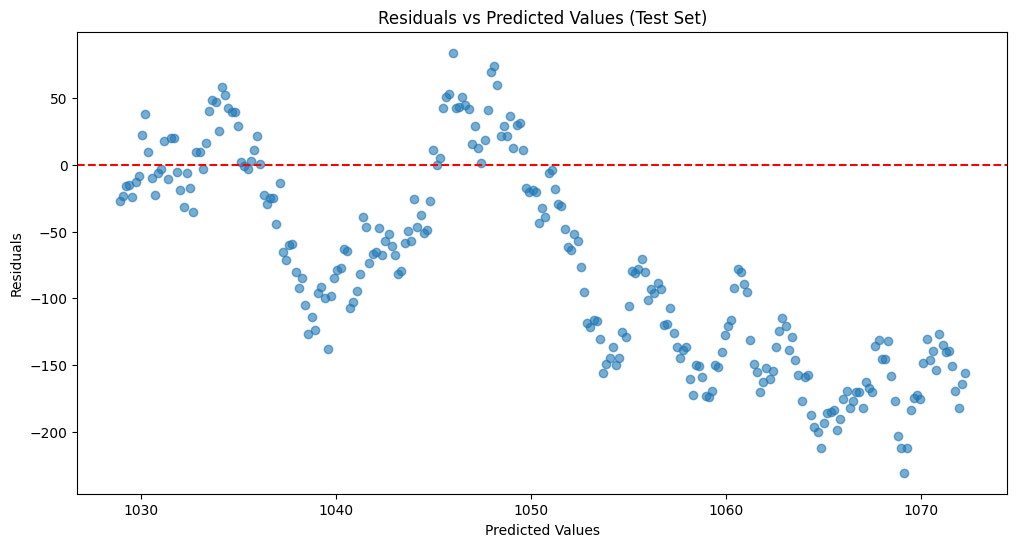

In [14]:
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6) #lower alpha (e.g., 0.3–0.7) to make overlapping parts visible.
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()


2. Histogram of Residuals:

In [15]:
bins = int(np.sqrt(len(df)))
bins

36

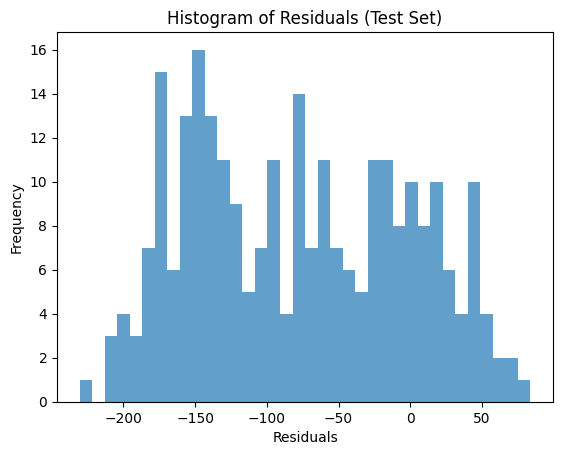

In [16]:
#bins: a value around 20–30 for general use and adjust based on how detailed you want the histogram to appear.
plt.hist(residuals_test, bins, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Test Set)')
plt.show()


II. Test Assumptions

1. Linearity Assumption:

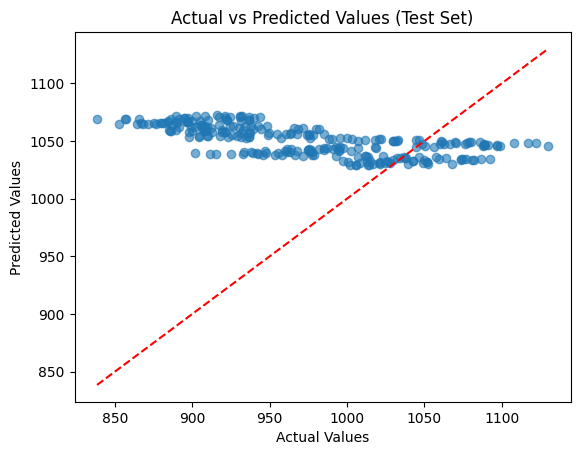

In [17]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


2. Homoscedasticity (Variance Uniformity):
#Use the residuals plot from Step 1 for this check.


3. Independence of Residuals:



In [18]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic:', dw_test)


Durbin-Watson statistic: 0.02394355967900707


SPLITING DATA 6-3-1

In [19]:
# Split the data into training, testing, and validation sets (6:3:1)
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [20]:
# Part of preparing data for training model
x_train = np.array(train_data.index).reshape(-1, 1) #reshapes the array into a 2D array
y_train = np.array(train_data['close']) #converts the "close" column of the train_data DataFrame into a 1D NumPy array

In [21]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [22]:
# The trained model uses the x_test data to make predictions, and the predicted values are stored in y_pred.
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data["close"])
y_pred = model.predict(x_test)

# Validation process
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data["close"])
y_pred_val = model.predict(x_val)

In [23]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1246.73644674 1247.04663041 1247.35681408 1247.66699775 1247.97718142
 1248.28736508 1248.59754875 1248.90773242 1249.21791609 1249.52809976
 1249.83828343 1250.1484671  1250.45865076 1250.76883443 1251.0790181
 1251.38920177 1251.69938544 1252.00956911 1252.31975277 1252.62993644
 1252.94012011 1253.25030378 1253.56048745 1253.87067112 1254.18085479
 1254.49103845 1254.80122212 1255.11140579 1255.42158946 1255.73177313]


In [24]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  203.42241978019325
Testing MAE:  188.82299105737852
Testing MAPE:  20.359277221502758
Validation RMSE:  283.44131458942826
Validation MAE:  279.8939933331146
Validation MAPE:  29.89737627800973


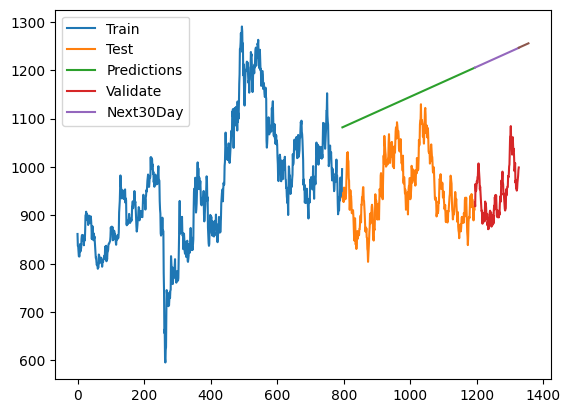

In [25]:
# Plot
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [26]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     69.61
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.79e-16
Time:                        09:38:42   Log-Likelihood:                -8007.9
No. Observations:                1327   AIC:                         1.602e+04
Df Residuals:                    1325   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.0017      5.549    165.075      0.0

I. Analyze Residuals (6:3:1)

1. Residual Plot

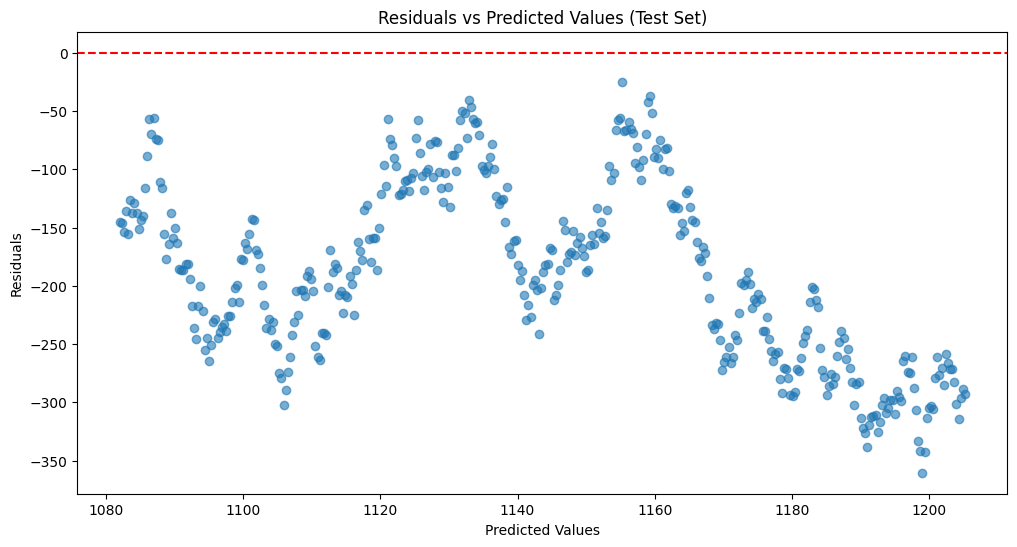

In [27]:
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6) #lower alpha (e.g., 0.3–0.7) to make overlapping parts visible.
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()


In [28]:
bins = int(np.sqrt(len(df)))
bins

36

2. Histogram of Residuals:

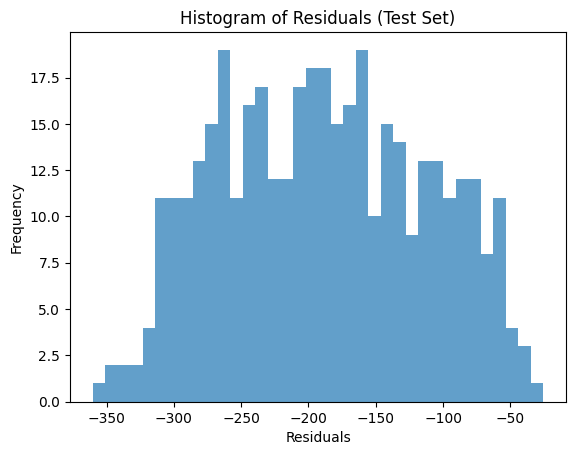

In [29]:
#bins: a value around 20–30 for general use and adjust based on how detailed you want the histogram to appear.
plt.hist(residuals_test, bins, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Test Set)')
plt.show()


I. TEST ASSUMPTION:

1. LINEARITY ASSUMPTION

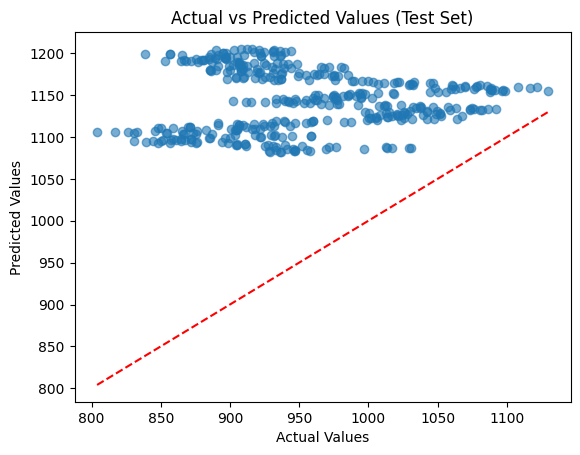

In [30]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


2. Homoscedasticity (Variance Uniformity):
#Use the residuals plot from Step 1 for this check.


3. Independence of Residuals:



In [31]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic:', dw_test)


Durbin-Watson statistic: 0.007342518611947444


SPLITING DATA 5-3-2

In [32]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [33]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['close'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1393.39226184 1393.83753171 1394.28280158 1394.72807146 1395.17334133
 1395.61861121 1396.06388108 1396.50915095 1396.95442083 1397.3996907
 1397.84496058 1398.29023045 1398.73550032 1399.1807702  1399.62604007
 1400.07130995 1400.51657982 1400.96184969 1401.40711957 1401.85238944
 1402.29765932 1402.74292919 1403.18819906 1403.63346894 1404.07873881
 1404.52400869 1404.96927856 1405.41454843 1405.85981831 1406.30508818]


In [34]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  221.2503237190538
Testing MAE:  206.0933997276464
Testing MAPE:  21.597917938430406
Validation RMSE:  401.72827049416105
Validation MAE:  398.37730783858416
Validation MAPE:  42.88579170683922


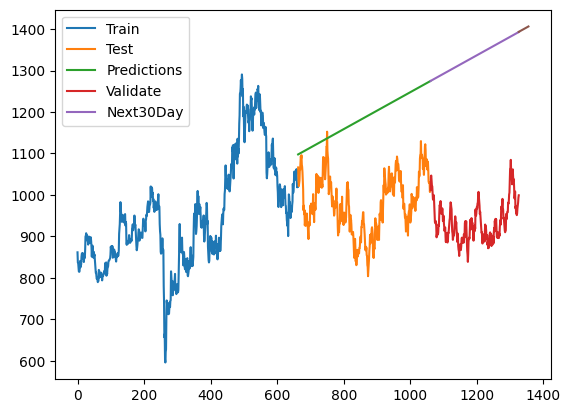

In [35]:
# Plot
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [36]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     69.61
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.79e-16
Time:                        09:38:43   Log-Likelihood:                -8007.9
No. Observations:                1327   AIC:                         1.602e+04
Df Residuals:                    1325   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.0017      5.549    165.075      0.0

I. Analyze Residuals (5:3:2)

1. Residual Plot

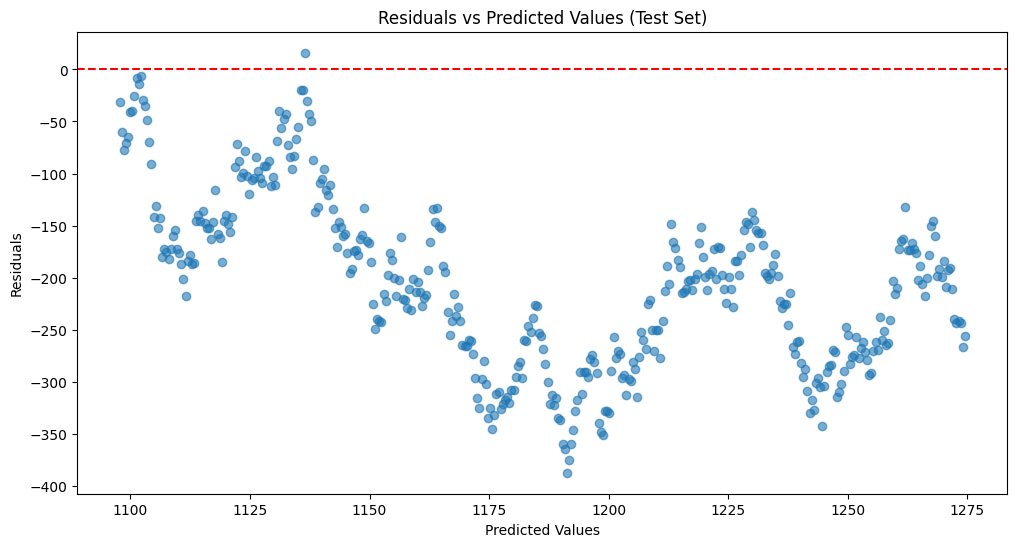

In [37]:
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6) #lower alpha (e.g., 0.3–0.7) to make overlapping parts visible.
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

2. Histogram of Residuals:

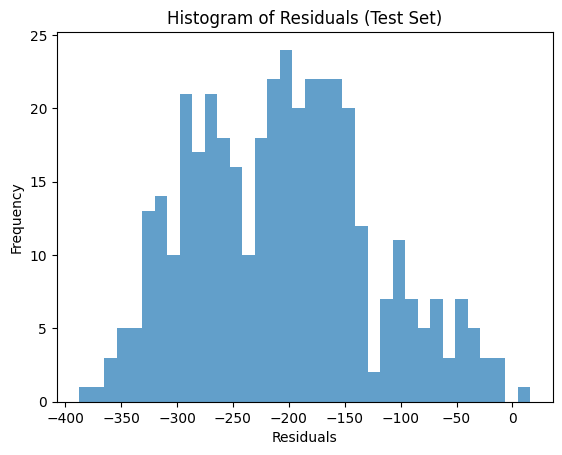

In [38]:
bins = int(np.sqrt(len(df)))
bins

#bins: a value around 20–30 for general use and adjust based on how detailed you want the histogram to appear.
plt.hist(residuals_test, bins, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Test Set)')
plt.show()



II. Test Assumptions

1. Linearity Assumption:

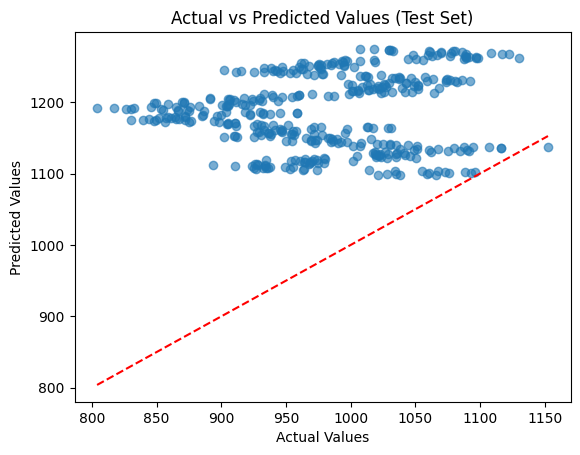

In [39]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

2. Homoscedasticity (Variance Uniformity):
#Use the residuals plot from Step 1 for this check.

3. Independence of Residuals:


In [40]:

from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic:', dw_test)

Durbin-Watson statistic: 0.0076632454498583025
